In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!pwd

Mounted at /content/gdrive
/content


In [2]:
cd gdrive/My\ Drive/Colab\ Notebooks/fastai-lesson-1

/content/gdrive/My Drive/Colab Notebooks/fastai-lesson-1


**Static vs Dynamic Graph**

Static computation creates the graph first created and then the operations are run on it. For example, in tf.Session(), we compute the already setup graph. The graph is set with fixed input size. It doesn't have to be rebuilt on every iteration.

Dynamic computation, however, executes the cells in the order we write the code. It is closer to writing native code and it creates the graph again and again everytime we run the next iteration.

Pytorch uses dynamic graph whereas Tensorflow uses static graph. Dynamic graph allows us to iterate and experiment quicker.

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
batch_size = 64

In [7]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/"annotations"
path_img = path/"images"

In [10]:
img_files = get_image_files(path_img)
img_files[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_106.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_148.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_194.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_72.jpg')]

In [0]:
regex_pat = r'/([^/]+)_\d+.jpg$'

In [12]:
data = ImageDataBunch.from_name_re(path_img, img_files, regex_pat, ds_tfms=get_transforms(), size=224, bs=batch_size)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,boxer,shiba_inu,Russian_Blue,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beagle,shiba_inu,Bombay,samoyed,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

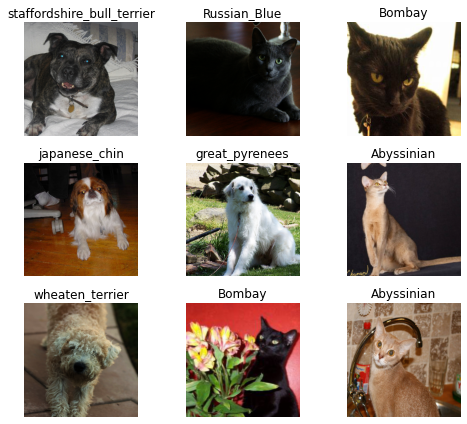

In [13]:
data.show_batch(3, figsize=(7, 6), )

In [14]:
print(data.classes)
print(len(data.classes), data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37 37


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.398755,0.293646,0.098106,01:49
1,0.618801,0.252491,0.079161,01:48
2,0.379697,0.203769,0.072395,01:49
3,0.268830,0.199047,0.068336,01:47


In [0]:
learn.save("stage-1")

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

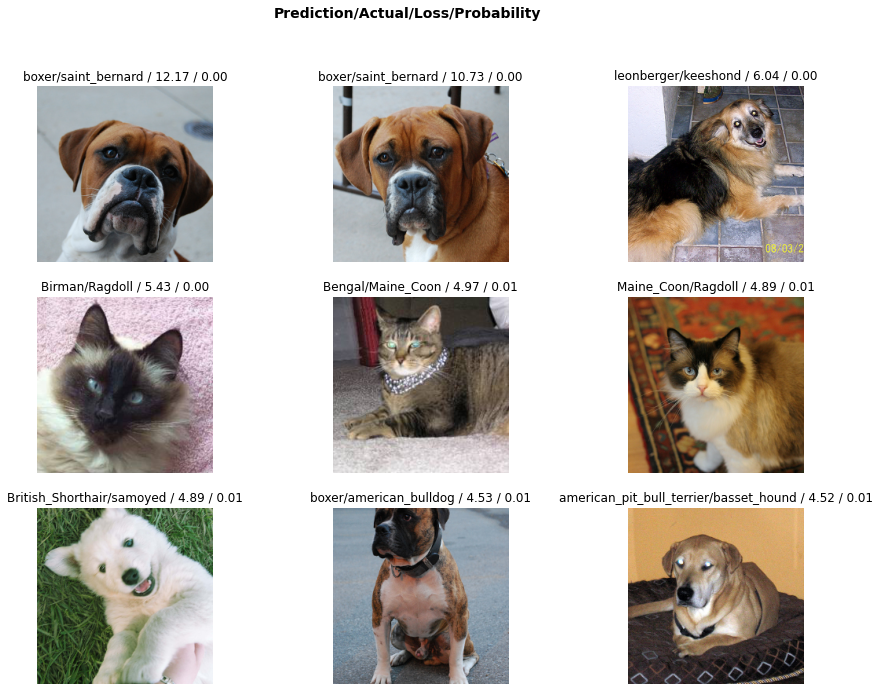

In [20]:
interp.plot_top_losses(9, figsize=(15, 11))

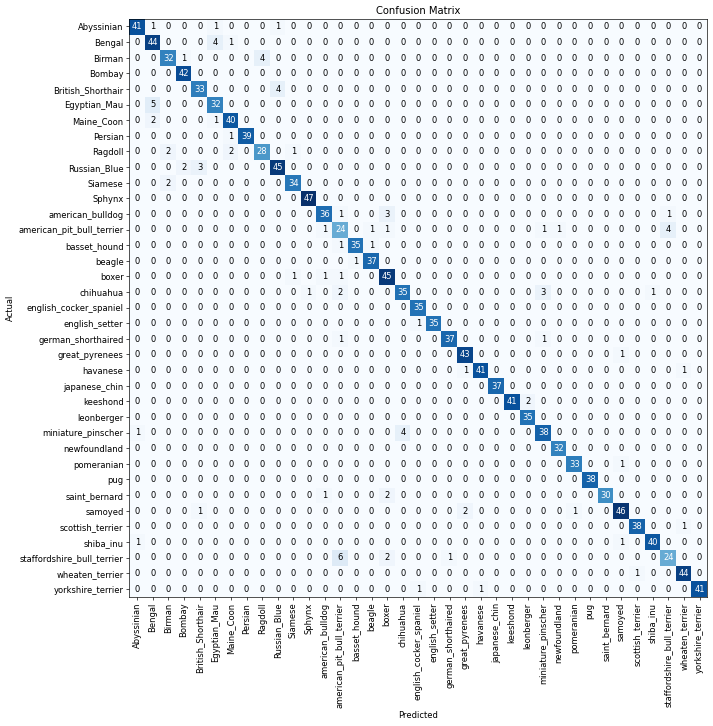

In [21]:
interp.plot_confusion_matrix(title="Confusion Matrix", figsize=(12, 12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Ragdoll', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'boxer', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Birman', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Birman', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('keeshond', 'leonberger', 2),
 ('saint_bernard', 'boxer', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'boxer', 2)]

In [0]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.696874,0.413847,0.123816,01:54


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


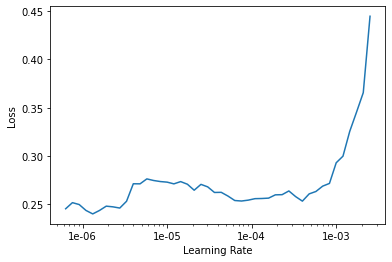

In [25]:
learn.load("stage-1")
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.264964,0.191313,0.063599,01:54
1,0.225597,0.190069,0.062246,01:52


In [29]:
data_50 = ImageDataBunch.from_name_re(path_img, img_files, regex_pat, ds_tfms=get_transforms(), size=224, bs=batch_size//2)
data_50.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,shiba_inu,saint_bernard,keeshond,scottish_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Bombay,german_shorthaired,scottish_terrier,Bombay
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [30]:
learn_50 = cnn_learner(data_50, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


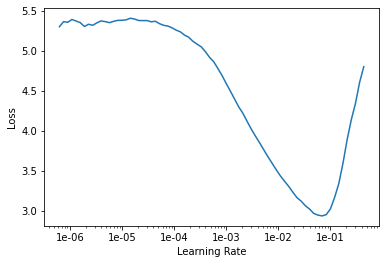

In [31]:
learn_50.lr_find()
learn_50.recorder.plot()

In [32]:
learn_50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.754641,0.299266,0.095399,02:09
1,0.551278,0.297329,0.086604,02:09
2,0.483701,0.252579,0.075101,02:07
3,0.358166,0.241827,0.070365,02:07
4,0.311800,0.240745,0.073748,02:08
5,0.200683,0.184575,0.052774,02:07
6,0.187105,0.171943,0.048714,02:09
7,0.145438,0.172505,0.050744,02:09


In [0]:
learn_50.save("stage-1-50")

In [35]:
learn_50.unfreeze()
learn_50.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.141419,0.178056,0.054804,02:26
1,0.129932,0.182569,0.052774,02:26
2,0.107533,0.179479,0.054127,02:26


In [0]:
learn_50 = learn_50.load("stage-1-50")

In [38]:
learn_50.unfreeze()
learn_50.fit_one_cycle(3, max_lr=slice(1e-3, 1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,6.393699,19.036701,0.951286,02:25


KeyboardInterrupt: ignored

In [0]:
learn_50 = learn_50.load("stage-1-50")

In [40]:
interp = ClassificationInterpretation.from_learner(learn_50)
# interp.plot_top_losses()
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Ragdoll', 'Birman', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2)]